- WAL 세그먼트는 기본적으로 16MB 파일이며, 내부적으로 8192바이트(8KB)의 페이지로 나누어짐.
- 첫 번째 페이지에는 다음에 의해 정의된 헤더 데이터가 있음.
- XLogLongPageHeaderData 다른 모든 페이지의 제목은 구조에 의해 정의된 페이지 정보를 가짐.
- XLogPageHeaderData구조 - 페이지 헤더 다음에 XLOG 레코드가 각 페이지 처음부터 내림차순으로 기록됨


**XLogLongPageHeaderData**



```
typedef XLogPageHeaderData *XLogPageHeader;

/*
 * When the XLP_LONG_HEADER flag is set, we store additional fields in the
 * page header.  (This is ordinarily done just in the first page of an
 * XLOG file.)	The additional fields serve to identify the file accurately.
 */
typedef struct XLogLongPageHeaderData
{
	XLogPageHeaderData std;		/* standard header fields */
	uint64		xlp_sysid;		/* system identifier from pg_control */
	uint32		xlp_seg_size;	/* just as a cross-check */
	uint32		xlp_xlog_blcksz;	/* just as a cross-check */
} XLogLongPageHeaderData;
```

**XLogPageHeaderData**

```
/*
 * Each page of XLOG file has a header like this:
 */
#define XLOG_PAGE_MAGIC 0xD113	/* can be used as WAL version indicator */

typedef struct XLogPageHeaderData
{
	uint16		xlp_magic;		/* magic value for correctness checks */
	uint16		xlp_info;		/* flag bits, see below */
	TimeLineID	xlp_tli;		/* TimeLineID of first record on page */
	XLogRecPtr	xlp_pageaddr;	/* XLOG address of this page */

	/*
	 * When there is not enough space on current page for whole record, we
	 * continue on the next page.  xlp_rem_len is the number of bytes
	 * remaining from a previous page; it tracks xl_tot_len in the initial
	 * header.  Note that the continuation data isn't necessarily aligned.
	 */
	uint32		xlp_rem_len;	/* total len of remaining data for record */
} XLogPageHeaderData;
```

**Internal layout of a WAL segment file.**

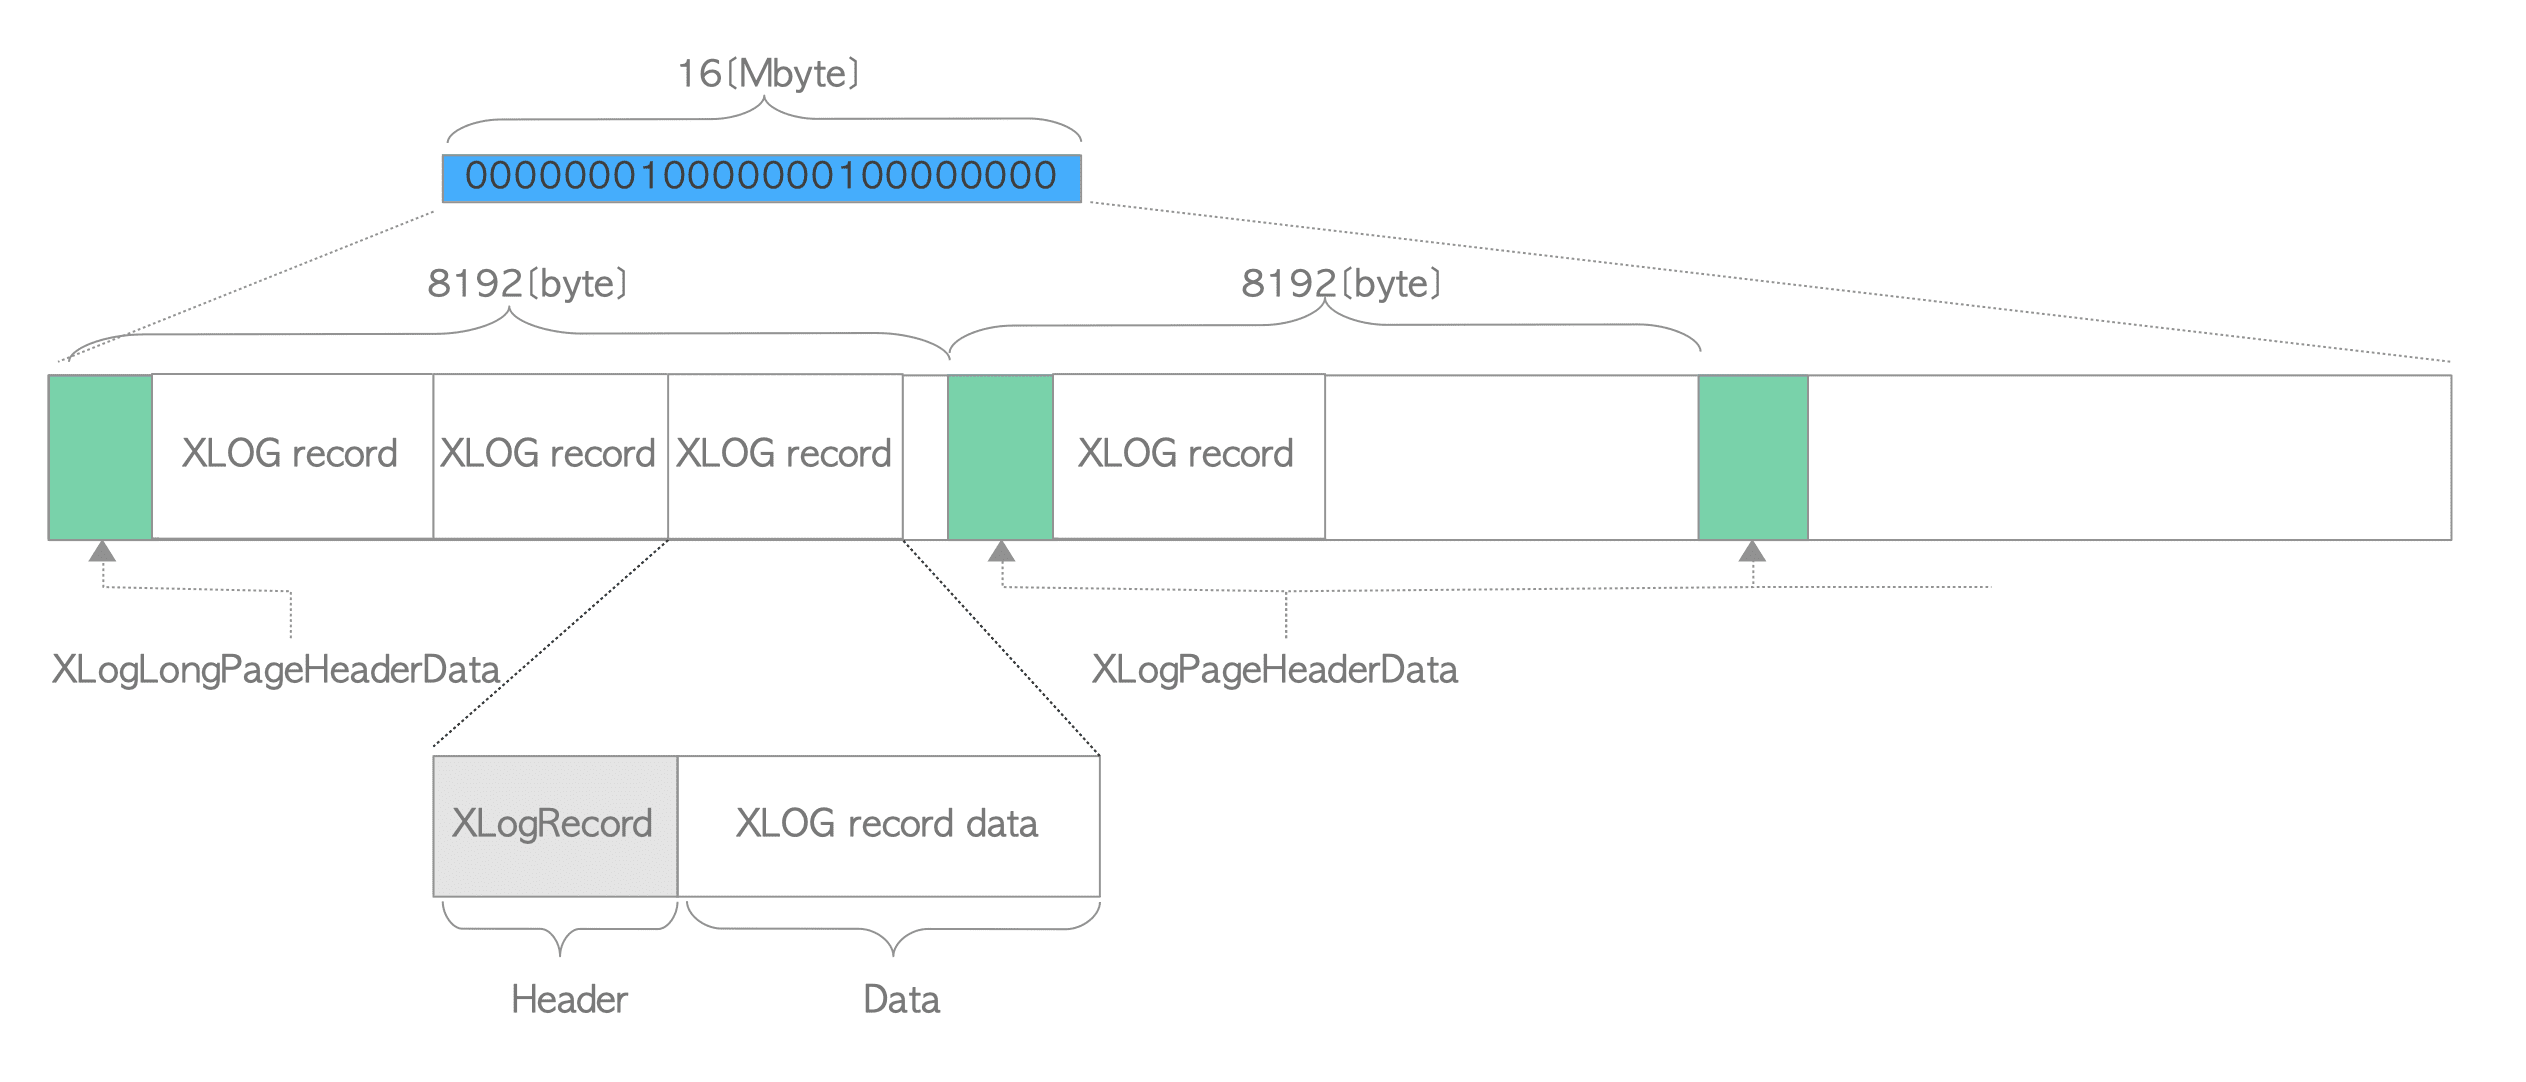